# 載入資料套件

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
# 匯入必要的包
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (10.0, 8.5)
datapath = "/content/gdrive/My Drive/AI_imdb/"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data0 = pd.read_excel(datapath+'0714trainv11_statA1.xlsx')

In [4]:
data = data0[['Input_A1_015','Input_C_086','Input_C_137','Input_A1_021','Input_C_056','Input_C_001','Input_C_059','Input_C_060','Input_A1_018','Input_A1_017','Input_C_039',"Input_A1_020"]]

In [5]:
print("data set shape: ", data.shape) # 看有幾個rows & columns
data.head() #顯示前五筆資料

data set shape:  (240, 12)


,Input_A1_015,Input_C_086,Input_C_137,Input_A1_021,Input_C_056,Input_C_001,Input_C_059,Input_C_060,Input_A1_018,Input_A1_017,Input_C_039,Input_A1_020
0,0.02,NaN,1,0.521,0.005,3.6,0.005,0.009,-0.04,-0.04,0.0012,0.0
1,0.02,0.010,1,0.563,0.004,4.0,0.005,0.012,-0.04,-0.03,0.0010,0.0
2,0.02,0.006,1,0.453,0.004,4.0,0.006,0.019,-0.04,-0.04,0.0012,0.0
3,0.02,NaN,1,0.453,0.005,3.4,0.005,0.016,-0.04,-0.04,0.0012,0.0
4,0.02,0.004,1,0.452,0.005,3.6,0.003,0.012,-0.03,-0.05,0.0012,0.0


In [6]:
# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count
print( 'train :' )
display( Missing_Counts(data) )

train :


,ColumnName,MissingCount,Percentage(%)
0,Input_C_086,53,22.08


In [7]:
data['is086'] = data['Input_C_086'].isnull().map( lambda x:0 if x==True else 1 )
# 計算每個 Title 的年齡平均值及中位數
Input_C_086_Mean = data[['Input_A1_020','Input_C_086']].groupby( by=['Input_A1_020'] ).mean()
Input_C_086_Mean.columns = ['Input_C_086 Mean']
Input_C_086_Mean.reset_index( inplace=True )
display( Input_C_086_Mean )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Input_A1_020,Input_C_086 Mean
0,0.0,0.006590
1,0.1,0.005239
2,0.2,0.004333
3,0.3,0.003900
4,0.4,0.008000
5,0.5,0.004000
6,0.6,0.004000


In [9]:
# 利用每個 Title 的年齡平均數，填補每個 Title 所對應 Age 的缺漏值
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.0),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.0,'Input_C_086 Mean'][0]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.1),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.1,'Input_C_086 Mean'][1]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.2),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.2,'Input_C_086 Mean'][2]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.3),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.3,'Input_C_086 Mean'][3]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.4),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.4,'Input_C_086 Mean'][4]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.5),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.5,'Input_C_086 Mean'][5]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.6),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.6,'Input_C_086 Mean'][6]

# 刪除 isAge 欄位 
data.drop( 'is086', axis=1, inplace=True )

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


KeyError: ignored

In [22]:
# 分離資料集
array = data.values
X = array[:, 0:11]
y = array[:, 11]
test_size = 0.2 # 20%測試集
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)



In [23]:
X_train.shape,X_test.shape

((192, 11), (48, 11))

In [24]:
y_train.shape, y_test.shape

((192,), (48,))

In [25]:
"""### 評估演算法

從直觀上看，只能得出由於部分資料的線性分佈，線性迴歸演算法和彈性網路迴歸演算法對解決問題可能有效。且由於資料的離散化，用決策樹演算法或者SVM演算法可能能生成高準確度的模型。

**但是我們仍然不清楚到底哪個演算法能生成準確度最高的模型。**需要設計評估框架來幫助我們選擇。這裡用10折交叉驗證來分離資料，用均方誤差來比較演算法準確度。其中，均方誤差越趨近於0，演算法的準確度就越高。
"""

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# 先不對原始資料進行任何處理，得出模型效能評價的基準
models = {}
models['LR'] = LinearRegression()
models['Lasso'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [27]:
# 直接評估演算法，得出一個baseline
results = []
for key in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(models[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

LR: -0.008336 (0.004593)
Lasso: -0.009651 (0.004987)
EN: -0.009651 (0.004987)
KNN: -0.008664 (0.005944)
CART: -0.010579 (0.007345)
SVM: -0.009374 (0.004739)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_

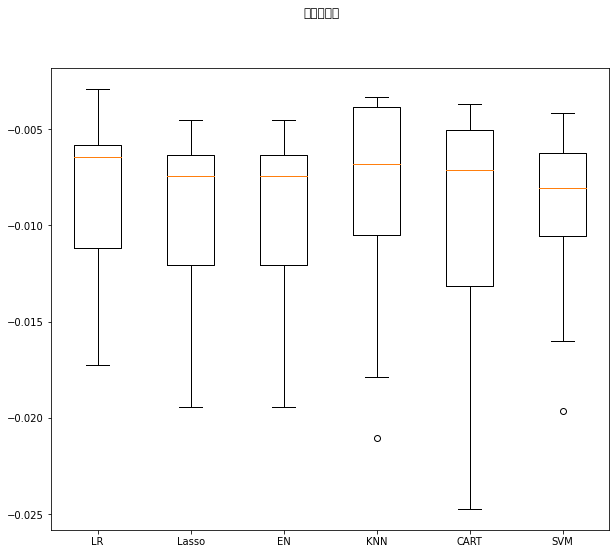

In [28]:
# 評估圖——箱線圖
fig = plt.figure()
fig.suptitle('演算法比較')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()


In [29]:
"""### 分析

線性演算法的分佈比較類似，K近鄰演算法結果分佈比較緊湊。如何從箱線圖上看出資料分佈的優劣呢？

### 正態化資料

將資料變成中值為0，方差為1的資料。用`Pipeline`來正態化資料和對模型進行評估，可以防止資料洩露。
"""

# 評估演算法
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('Lasso', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])

pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

results = []
for key in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(pipelines[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))


ScalerLR: -0.008336 (0.004593)
ScalerLASSO: -0.009651 (0.004987)
ScalerEN: -0.009651 (0.004987)
ScalerKNN: -0.007654 (0.004615)
ScalerCART: -0.011832 (0.007324)
ScalerSVM: -0.008087 (0.003486)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_

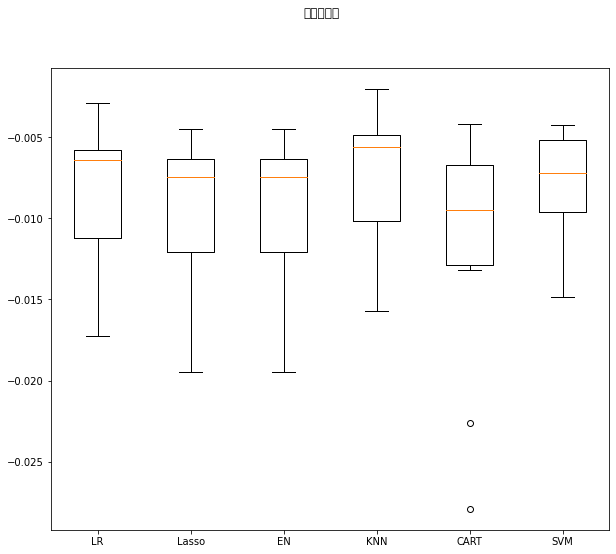

array([-0.00389965, -0.00566798, -0.00629101, -0.00650638, -0.01726482,
       -0.0149168 , -0.01259038, -0.00698413, -0.00635208, -0.00288709])

In [31]:
"""### 分析
正則化以後，KNN演算法的MSE最優。
"""

# 評估演算法：箱線圖
fig = plt.figure()
fig.suptitle('演算法評估')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

type(results)

results[0]

In [32]:

"""### 開始調參

通過上面的分析我們看到KNN演算法具有最好的結果，能不能更好呢？這就進入到調參的過程了，即前面學過的網格搜尋和隨機搜尋等方法。
"""

# 網格搜尋
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍歷引數
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)

print('最優： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params'])

for mean, std, param in cv_results:
  print('%f (%f) with %r' % (mean, std, param))

最優： -0.006972843350981003 使用{'n_neighbors': 13}
-0.011171 (0.005544) with {'n_neighbors': 1}
-0.007899 (0.004438) with {'n_neighbors': 3}
-0.007547 (0.004438) with {'n_neighbors': 5}
-0.007028 (0.004267) with {'n_neighbors': 7}
-0.007100 (0.004375) with {'n_neighbors': 9}
-0.007149 (0.004521) with {'n_neighbors': 11}
-0.006973 (0.004519) with {'n_neighbors': 13}
-0.007148 (0.004609) with {'n_neighbors': 15}
-0.007262 (0.004718) with {'n_neighbors': 17}
-0.007250 (0.004578) with {'n_neighbors': 19}
-0.007199 (0.004411) with {'n_neighbors': 21}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
"""### 整合演算法
除了使用調參方法以外，還可以用整合演算法提升準確率。現在對線性迴歸，K近鄰以及迴歸樹進行整合看看效果。
"""

ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(ensembles[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -0.007272 (0.003542)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB-KNN: -0.011697 (0.006347)
ScaledAB-LR: -0.010710 (0.005316)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRFR: -0.007023 (0.003932)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledETR: -0.007294 (0.004103)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBR: -0.007731 (0.003696)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28436 missing from current font.
  font.set_

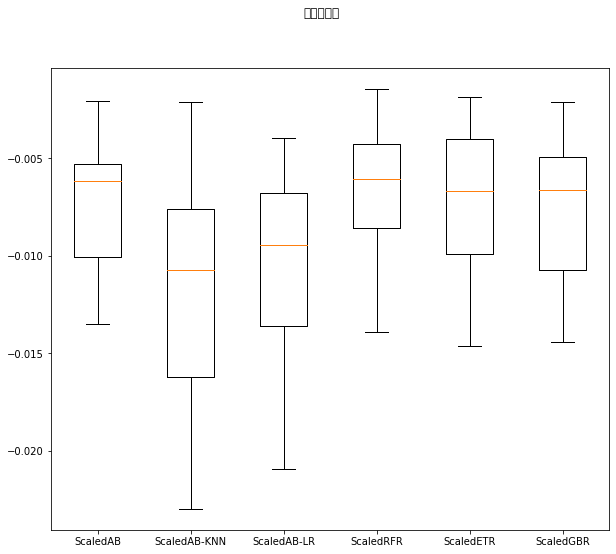

In [34]:
# 評估圖——箱線圖
fig = plt.figure()
fig.suptitle('演算法比較')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [39]:

"""### 整合演算法調參

整合演算法有一個引數`n_estimators`， 這個可以調整，看看是否可以得到有提升的結果。
"""
# GBM演算法調參——網格搜尋
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍歷引數
param_grid = {'n_estimators': [10,50,100,200,300,400,500,600,700, 800,900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)
print('最優： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


最優： -0.007344044149493055 使用{'n_estimators': 50}


In [36]:
# ET演算法調參——網格搜尋
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍歷引數
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)
print('最優： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


最優： -0.007229020467836257 使用{'n_estimators': 30}


In [40]:
# 訓練模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=30)
gbr.fit(X=rescaledX, y=y_train)

# 評估演算法模型
rescaledX_test = scaler.transform(X_test)
predictions = gbr.predict(rescaledX_test)

print(mean_squared_error(y_test, predictions)) # 最後求出均方誤差

0.004814351851851852


In [41]:
from sklearn import metrics
print('R2 score:%.2f'%metrics.r2_score(y_test, predictions))

R2 score:0.38


In [42]:
# 訓練模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(X=rescaledX, y=y_train)

# 評估演算法模型
rescaledX_test = scaler.transform(X_test)
predictions = gbr.predict(rescaledX_test)

print(mean_squared_error(y_test, predictions)) # 最後求出均方誤差

0.006520522142552258


In [43]:
from sklearn import metrics
print('R2 score:%.2f'%metrics.r2_score(y_test, predictions))

R2 score:0.16


In [ ]:
# y = df['y']
# x = d.drop('y', axis=1)
# x = array[:, 1:267]
# y = array[:, 268:289]
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x, y)
importance = gbr.feature_importances_
indices = np.argsort(importance)[::-1] 
features = X_train.columns 
for f in range(X_train.shape[1]): 
  print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))

ValueError: ignored

In [ ]:
"""### 顯示最後結果最好的是ET模型。"""
from sklearn.decomposition import PCA

# 訓練模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
pca = PCA(n_components=2)
pca.fit(X=rescaledX, y=y_train)
print(pca.fit_transform(X=rescaledX, y=y_train))
# # 評估演算法模型
# rescaledX_test = scaler.transform(X_test)
# predictions = pca.predict(rescaledX_test)

# type(rescaledX_test)

# rescaledX_test

# print(mean_squared_error(y_test, predictions)) # 最後求出均方誤差

In [ ]:
from sklearn import cross_validation, ensemble, preprocessing, metrics

# 訓練模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ensemble.BaggingClassifier(n_estimators = 100)
gbr.fit(X=rescaledX, y=y_train)

# 評估演算法模型
rescaledX_test = scaler.transform(X_test)
predictions = gbr.predict(rescaledX_test)

type(rescaledX_test)

rescaledX_test

print(mean_squared_error(y_test, predictions)) # 最後求出均方誤差

0.009561045248143572


In [ ]:
from sklearn import metrics
print('R2 score:%.2f'%metrics.r2_score(y_test, predictions))

R2 score:0.24
